## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data

In [2]:
df=pd.read_csv('heart_disease.csv')

In [3]:
print(df.shape)
print('\n')
df.head()

(303, 14)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()
df.isna()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory data analysis

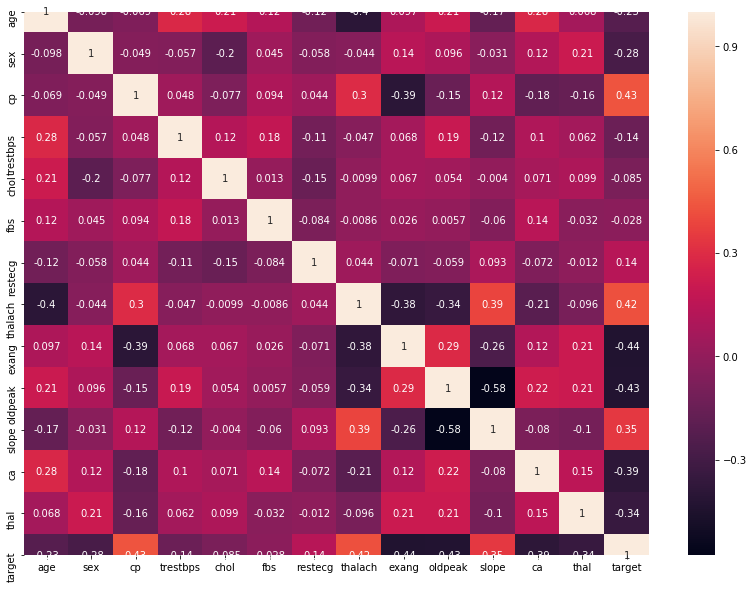

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

1    165
0    138
Name: target, dtype: int64


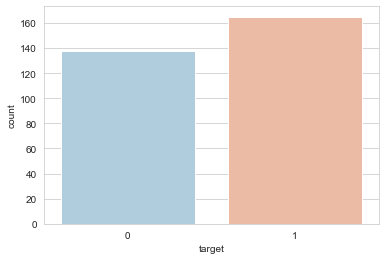

In [7]:
df['target']=df['target'].apply(lambda x: 0 if x==0 else 1)
print(df['target'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

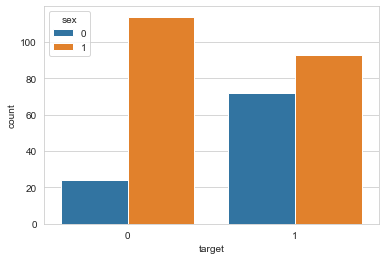

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df)

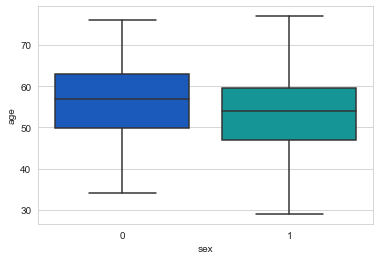

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex',y='age',data=df,palette='winter')

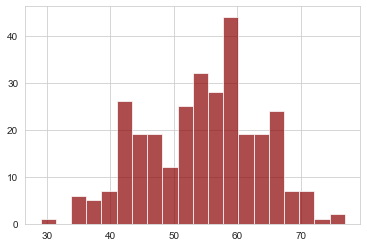

In [10]:
df['age'].hist(bins=20,color='darkred',alpha=0.7)

## Train Test Split

In [11]:
X=df.drop(['target', 'fbs', 'chol'], axis=1)
#X=df.drop('target', axis=1)
y=df['target']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

     age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
124   39    0   2        94        1      179      0      0.0      2   0     2
72    29    1   1       130        0      202      0      0.0      2   0     2
15    50    0   2       120        1      158      0      1.6      1   0     2
10    54    1   0       140        1      160      0      1.2      2   0     2
163   38    1   2       138        1      173      0      0.0      2   4     2
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   ...
188   50    1   2       140        1      163      0      0.6      1   1     3
71    51    1   2        94        1      154      1      0.0      2   1     3
106   69    1   3       160        0      131      0      0.1      1   1     2
270   46    1   0       120        0      144      0      0.8      2   0     3
102   63    0   1       140        1      179      0      0.0      2   2     2

[212 rows x 11 columns]
     age  sex  cp  trestbps

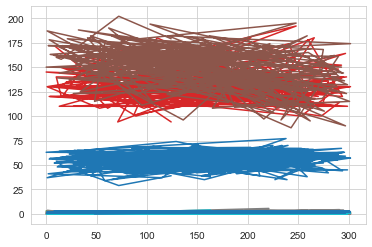

(212, 11)


,count,mean,std,min,25%,50%,75%,max
age,212.0,54.349057,9.194107,29.0,47.75,55.0,61.0,77.0
sex,212.0,0.660377,0.474702,0.0,0.00,1.0,1.0,1.0
cp,212.0,1.014151,1.037125,0.0,0.00,1.0,2.0,3.0
trestbps,212.0,130.471698,17.020594,94.0,120.00,130.0,140.0,192.0
restecg,212.0,0.542453,0.527077,0.0,0.00,1.0,1.0,2.0
thalach,212.0,150.146226,22.751956,88.0,135.25,154.0,168.0,202.0
exang,212.0,0.320755,0.467871,0.0,0.00,0.0,1.0,1.0
oldpeak,212.0,1.014151,1.091669,0.0,0.00,0.8,1.6,5.6
slope,212.0,1.415094,0.613713,0.0,1.00,1.0,2.0,2.0
ca,212.0,0.641509,0.950816,0.0,0.00,0.0,1.0,4.0


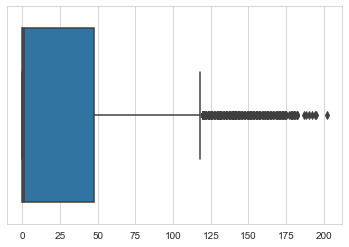

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train)
print(X_test)
plt.plot(X_train)
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(X_train)
print(X_train.shape)
X_train.describe().transpose()

In [14]:
from sklearn.metrics import accuracy_score

## Scaling

[[0.20833333 0.         0.66666667 ... 1.         0.         0.66666667]
 [0.         1.         0.33333333 ... 1.         0.         0.66666667]
 [0.4375     0.         0.66666667 ... 0.5        0.         0.66666667]
 ...
 [0.83333333 1.         1.         ... 0.5        0.25       0.66666667]
 [0.35416667 1.         0.         ... 1.         0.         1.        ]
 [0.70833333 0.         0.33333333 ... 1.         0.5        0.66666667]]
[[0.58333333 1.         0.         ... 0.5        0.25       0.33333333]
 [0.625      1.         1.         ... 0.5        0.         1.        ]
 [0.58333333 1.         0.66666667 ... 1.         0.25       1.        ]
 ...
 [0.79166667 0.         0.         ... 1.         0.5        0.66666667]
 [0.60416667 1.         0.66666667 ... 0.5        0.         1.        ]
 [0.97916667 0.         0.66666667 ... 0.5        0.         0.66666667]]
(212, 11)


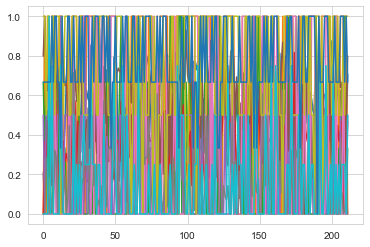

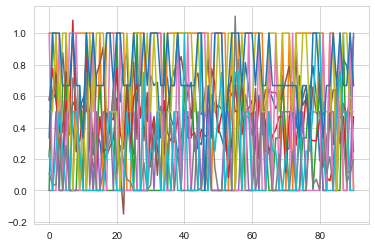

Descriptive analysis
Array = [[0.20833333 0.         0.66666667 ... 1.         0.         0.66666667]
 [0.         1.         0.33333333 ... 1.         0.         0.66666667]
 [0.4375     0.         0.66666667 ... 0.5        0.         0.66666667]
 ...
 [0.83333333 1.         1.         ... 0.5        0.25       0.66666667]
 [0.35416667 1.         0.         ... 1.         0.         1.        ]
 [0.70833333 0.         0.33333333 ... 1.         0.5        0.66666667]]
Measures of Central Tendency
Mean = 0.44181789240928837
Median = 0.48245614035087714
Measures of Dispersion
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Varience = 0.128857270902473
Standard Deviation = 0.3589669495963006


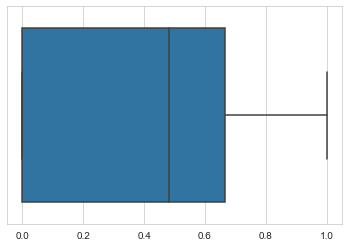

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(X_train.shape)
plt.plot(X_train)
plt.show()
plt.plot(X_test)
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(X_train)

mean = np.mean(X_train)
median = np.median(X_train)
  
# measures of dispersion
min = np.amin(X_train)
max = np.amax(X_train)
range = np.ptp(X_train)
varience = np.var(X_train)
sd = np.std(X_train)
  
print("Descriptive analysis")
print("Array =", X_train)
print("Measures of Central Tendency")
print("Mean =", mean)
print("Median =", median)
print("Measures of Dispersion")
print("Minimum =", min)
print("Maximum =", max)
print("Range =", range)
print("Varience =", varience)
print("Standard Deviation =", sd)

## Build the Model with BaggingClassifier

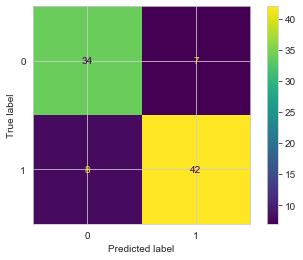

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
bagg = BaggingClassifier(n_estimators=100, random_state=42)
clf = bagg.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [17]:
y_pred_bagg=bagg.predict(X_test)
score=accuracy_score(y_test, y_pred_bagg)
print(score)
print (classification_report(y_pred_bagg, y_test))
print(bagg.score(X_test,y_test)) # R-squared 
print(mean_absolute_error(y_test, y_pred_bagg))
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred_bagg))  # Test MSE

0.8351648351648352
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

0.8351648351648352
0.16483516483516483
Mean squared error: 0.165


In [57]:
# from sklearn import linear_model

# regression = linear_model.LinearRegression()
# regression.fit(X_train, y_train)

# y_pred = regression.predict(X_test) 

# print(regression.score(X_test,y_test)) # R-squared 
# print(mean_absolute_error(y_test, y_pred))
# print("Mean squared error: %.3f"
#       % mean_squared_error(y_test, y_pred))  # Test MSE

0.3936952923720174
0.30612954406617926
Mean squared error: 0.150


## Save the Model

In [172]:
import pickle
pickle_out=open("heartdisease.pkl", "wb")
pickle.dump(bagg, pickle_out)
pickle_out.close()